In [8]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Prepare the dataset for analysis
# Read in csv file
file_path = "Conditions_Contributing_to_COVID-19_Deaths__by_State_and_Age__Provisional_2020-2023.csv"
inital_df = pd.read_csv(file_path)

# Drop the unwanted columns.
inital_df = inital_df.drop(columns=['Data As Of', 'Start Date', 'End Date', 'ICD10_codes', 'Number of Mentions', 'Flag'])

# Only keep the rows where the Group is "By Month", and delete the row where Age Group is "All Ages"
inital_df = inital_df.loc[inital_df['Group'] == 'By Month']
clean_df = inital_df.loc[inital_df['Age Group'] != 'All Ages']

# Drop the NaN values
clean_df = clean_df.dropna()

# Convert Year and Month columns to integers
clean_df.loc[:, 'Year'] = clean_df['Year'].astype(int)
clean_df.loc[:, 'Month'] = clean_df['Month'].astype(int)
clean_df.loc[:, 'COVID-19 Deaths'] = clean_df['COVID-19 Deaths'].astype(int)

clean_df.head()

,Group,Year,Month,State,Condition Group,Condition,Age Group,COVID-19 Deaths
62100,By Month,2020,1,United States,Respiratory diseases,Influenza and pneumonia,0-24,0
62101,By Month,2020,2,United States,Respiratory diseases,Influenza and pneumonia,0-24,0
62102,By Month,2020,3,United States,Respiratory diseases,Influenza and pneumonia,0-24,9
62103,By Month,2020,4,United States,Respiratory diseases,Influenza and pneumonia,0-24,27
62104,By Month,2020,5,United States,Respiratory diseases,Influenza and pneumonia,0-24,19


In [11]:
influenza_df = clean_df.loc[clean_df['Condition'] == 'Influenza and pneumonia']
influenza_df = influenza_df[influenza_df['Age Group'] != 'Not stated']

influenza_df

,Group,Year,Month,State,Condition Group,Condition,Age Group,COVID-19 Deaths
62100,By Month,2020,1,United States,Respiratory diseases,Influenza and pneumonia,0-24,0
62101,By Month,2020,2,United States,Respiratory diseases,Influenza and pneumonia,0-24,0
62102,By Month,2020,3,United States,Respiratory diseases,Influenza and pneumonia,0-24,9
62103,By Month,2020,4,United States,Respiratory diseases,Influenza and pneumonia,0-24,27
62104,By Month,2020,5,United States,Respiratory diseases,Influenza and pneumonia,0-24,19
...,...,...,...,...,...,...,...,...
537816,By Month,2022,10,Puerto Rico,Respiratory diseases,Influenza and pneumonia,85+,29
537817,By Month,2022,11,Puerto Rico,Respiratory diseases,Influenza and pneumonia,85+,36
537818,By Month,2022,12,Puerto Rico,Respiratory diseases,Influenza and pneumonia,85+,43
537819,By Month,2023,1,Puerto Rico,Respiratory diseases,Influenza and pneumonia,85+,46


In [22]:
total_deaths_by_age_group = influenza_df.groupby('Age Group')['COVID-19 Deaths'].sum()

print(total_deaths_by_age_group)

total_deaths = total_deaths_by_age_group.sum()

print("Total number of COVID-19 deaths:", total_deaths)

Age Group
0-24       1893
25-34      9257
35-44     26977
45-54     71501
55-64    161435
65-74    252938
75-84    270389
85+      234730
Name: COVID-19 Deaths, dtype: int64
Total number of COVID-19 deaths: 1029120


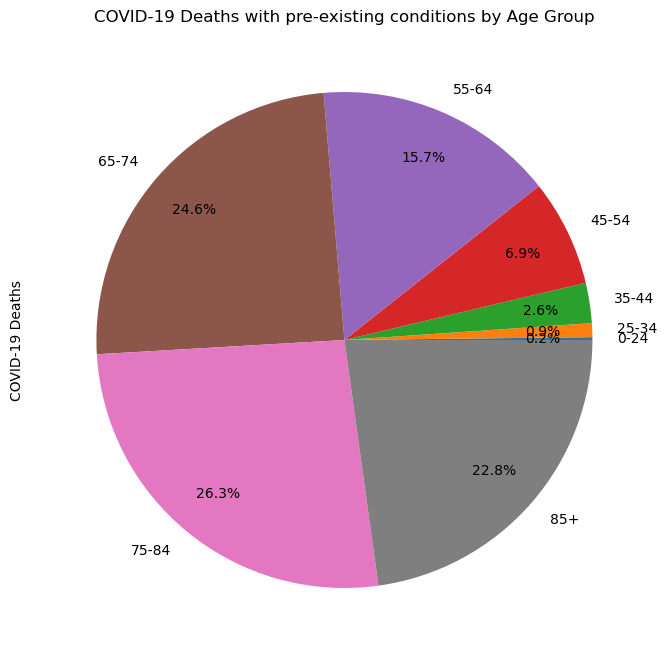

In [24]:
# Create a pie chart with age group labels inside the slices
total_deaths_by_age_group.plot(kind='pie', figsize=(8, 10), title='COVID-19 Deaths with pre-existing conditions by Age Group', autopct='%1.1f%%', pctdistance=0.8, labeldistance=1.1)

# Show the chart
plt.show()